# Parametric hypothesis testing
## by the construction of appropriate confidence intervals

Parametric hypothesis testing is a statistical method used to make inferences about population parameters based on sample data.

The general process of parametric hypothesis testing involves the following steps:

1. **Formulate Hypotheses:**
   - Null Hypothesis (H0): Represents the status quo or a statement of no effect.
   - Alternative Hypothesis (H1): Represents a deviation from the status quo or a statement of effect.

2. **Choose a Significance Level (α):**
   - The significance level, often denoted by α, is the probability of rejecting the null hypothesis when it is true. Common choices include 0.05, 0.01, or 0.10.

3. **Collect Data:**
   - Obtain a sample from the population of interest.

4. **Select a Test Statistic:**
   - Choose a statistic that is appropriate for the hypothesis being tested.

5. **Calculate the Test Statistic:**
   - Compute the test statistic using the sample data and the chosen test.

6. **Make a Decision:**
   - Compare the test statistic to a critical value or p-value to determine whether to reject the null hypothesis.

7. **Draw Conclusions:**
   - Based on the comparison, either reject or fail to reject the null hypothesis.



In [28]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# generating random samples from a normal distribution
# with a specified mean (m) and standard deviation (sigma).
# samples are drawn using the stats.norm.rvs function from the scipy.stats module

m = 5
sigma = 3
number_of_samples = 50 # for calculation of only one mean

xs = stats.norm.rvs(size=number_of_samples,loc=m,scale=sigma) # samples from normal distribution
average_value = np.mean(xs)
average_value

5.051013882332015

Calculating a two-sided confidence interval for the mean of the population based on the samples generated earlier. The goal is to test the hypothesis $H_0: E(X) = 5$ against the alternative $H_1: E(X) \neq 5$.



- `s = np.std(xs, ddof=1)`: Estimates the standard deviation $(s)$ of the sample data. The `ddof` parameter is set to 1 to apply Bessel's correction, which corrects the bias in the estimation of the population standard deviation.
- `alpha = 0.05`: Sets the significance level, and thus the confidence level, to $1 - \alpha = 0.95$.
- `CI = stats.t.interval(1 - alpha, df=number_of_samples - 1, loc=average_value, scale=s / number_of_samples**0.5)`: Calculates the two-sided confidence interval for the mean using the t-distribution. The `interval` function takes the confidence level (`1 - alpha`), degrees of freedom (`df`), mean (`loc`), and standard error (`scale`). The standard error is calculated as $\dfrac{s}{\sqrt{n}}$, where $n$ is the number of samples.

In [30]:
# We will test the hypothesis that E(X)=5 (H0), while H1: E(X) is different than 5
# Hence, we find the two-sided CI (assume that we don't know the variance):

# standard deviation estiamtor:
s = np.std(xs,ddof=1) # samples of the estimates of std
alpha = 0.05   # level of confidence is 1-alpha=0.95

CI = stats.t.interval(1-alpha,df=number_of_samples-1,loc=average_value, scale=s/number_of_samples**0.5)
average_value, CI

(5.051013882332015, (4.058306355797322, 6.043721408866707))

If the point 5 belongs to the CI we cannot reject $H_0$ with the confidence level $\alpha$

In [3]:
# by changing alpha we get the p-value (alpha for which a bound of the interval is equal 5):

alpha = 0.28  # level of confidence je 1-alpha

CI = stats.t.interval(1-alpha,df=number_of_samples-1,loc=average_value, scale=s/number_of_samples**0.5)
CI

(4.460947988088581, 5.40597536357398)

0.9179179179179179


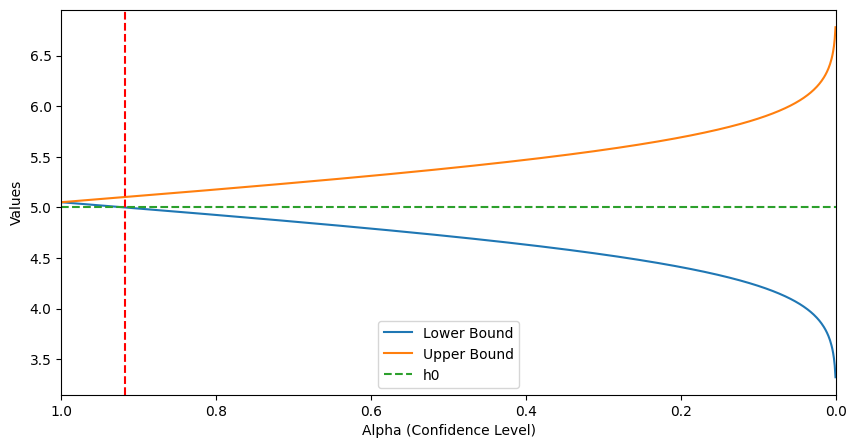

In [32]:
h0 = 5

# Create an array of alpha values
a = np.linspace(1, 0, 1000)

# Initialize empty lists to store results
lb_list = []
ub_list = []

p_value = None  # To track when p-value enters the interval

for alpha in a:
    # Calculate the confidence interval
    lb, ub = stats.t.interval(1 - alpha, df=number_of_samples - 1, loc=average_value, scale=s / (number_of_samples ** 0.5))

    lb_list.append(lb)
    ub_list.append(ub)

    if p_value is None and lb <= h0 <= ub:
        p_value = alpha
        print(p_value)

   # if lb <= h0 <= ub:
       #print(f'{h0:.2f} je u intervalu [{lb:.2f}, {ub:.2f}], sirina intervala: {(ub - lb):.2f}, nivo znacajnosti: {alpha:.2f}')

plt.figure(figsize=(10, 5))
plt.plot(a, lb_list, label='Lower Bound')
plt.plot(a, ub_list, label='Upper Bound')
plt.plot(a, [h0] * len(a), label='h0', linestyle='dashed')

plt.xlabel('Alpha (Confidence Level)')
plt.ylabel('Values')
plt.legend()

# Add a vertical line at p_value_within_bounds and p_value_exit_bounds
plt.axvline(x=p_value, color='r', linestyle='--')

# Set the x-axis limit to start from 1
plt.xlim(1, 0)
plt.show()

Calculating a two-sided p-value based on the observed sample mean, a hypothesized population mean (5 in this case), and the standard error of the mean.


- `margin = np.abs(average_value - 5)`: Calculates the margin of error, which represents the absolute difference between the sample mean (`average_value`) and the hypothesized population mean (5 in this case).

- `Quantile = margin * (number_of_samples**0.5 / s)`: Calculates the test statistic in terms of standard errors.

- `p_value = 2 * (1 - stats.t.cdf(Quantile, df=number_of_samples - 1))`: Calculates the two-sided p-value using the cumulative distribution function (CDF) of the t-distribution. The p-value is based on the test statistic (`Quantile`) and the degrees of freedom (`df`), which is equal to the number of samples minus 1. Multiplying by 2 accounts for the two tails of the distribution in a two-sided test.



In [33]:
# we can obtain the p-value directly (inverse of the calculation of the CI bounds):

margin = np.abs(average_value-5)
Quantile = margin*(number_of_samples**0.5/s)

p_value = 2*(1-stats.t.cdf(Quantile,df=number_of_samples-1))

p_value

0.9181707253869711

In [5]:
#if the p-value is relatively high (e.g. larger than 0.1) - we are quite sure that we will not reject H0

### Exercise 1: in the same way find the p-value of the variance tessting  (H0: Var=9, H1: Var different than 9)

### Exercise 2: Read temperature data from temeprature.csv, choose a city, estimate ME, and find the p-value of the appropriate hypothesis tests

# Nonparametric hypothesis tests about the RV distribution


Nonparametric hypothesis tests are statistical tests that make fewer assumptions about the underlying population distribution compared to their parametric counterparts. Unlike parametric tests, nonparametric tests do not require the data to follow a specific distribution (e.g., normal distribution). Instead, they are based on the ranks or other distribution-free measures.

## Chi-square test

The Chi-square test is a statistical test used to determine if there is a significant association between two categorical variables.

The `chisquare` function from the `scipy.stats` module in Python performs a Chi-square goodness-of-fit test. The `chisquare` function tests the null hypothesis that the observed frequencies in a given dataset follow the expected frequencies specified by a theoretical distribution.

In the example below, the expected frequencies are set assuming a uniform distribution. The `chisquare` function then calculates the Chi-square statistic and corresponding p-value. The null hypothesis is that the observed frequencies follow the specified theoretical distribution.

Keep in mind that you can adjust the expected distribution based on your hypothesis or theoretical expectation for the data. The p-value will help you assess whether there is evidence to reject the null hypothesis of a good fit between the observed and expected frequencies. If the p-value is small (typically below a chosen significance level, such as 0.05), you may reject the null hypothesis.

In [37]:
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0)
# f_obs are the observerd frequencies on each interval, f_exp are the expected frequencies,
# ddof is the number of parameters that we had to estimate from the given sample

stats.chisquare([16, 18, 16, 14, 12, 12])  # if we don't specify f_exp then uniform is assumed

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)

In [38]:
observed_frequencies = [16, 18, 16, 14, 12, 12]

# Assuming a uniform distribution as the expected distribution
total_observed = sum(observed_frequencies)
expected_frequency = total_observed / len(observed_frequencies)

expected_frequencies = [expected_frequency] * len(observed_frequencies)

# Perform the Chi-square goodness-of-fit test
chi2_stat, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square statistic: 2.0
P-value: 0.8491450360846096


In [7]:
#  hence, for this case, we will not reject the hypotheses H0 (data is from uniform distribution)

## Kolmogorov and Smirnov test

The Kolmogorov-Smirnov (K-S) test is a nonparametric test used to assess whether a sample comes from a specific distribution. It compares the cumulative distribution function (CDF) of the sample with the expected cumulative distribution function of the theoretical distribution. The K-S test is sensitive to differences in both location and shape of the empirical and theoretical distributions.

Here is how you can perform a one-sample Kolmogorov-Smirnov test using Python with the `scipy.stats` module:

```python
from scipy.stats import kstest
import numpy as np

# Example data
sample_data = np.random.normal(0, 1, 100)

# Perform one-sample Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(sample_data, 'norm')

print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)
```

In this example:

- `sample_data` is an array of sample data that you want to test against a normal distribution.
- `kstest` is used to perform the one-sample K-S test. The second argument ('norm') specifies the name of the cumulative distribution function (CDF) to compare against, which, in this case, is the normal distribution.

The null hypothesis for the one-sample K-S test is that the sample is drawn from the specified distribution. A small p-value (typically below a chosen significance level, such as 0.05) would lead to the rejection of the null hypothesis, suggesting that the sample does not come from the specified distribution.


In [39]:
from scipy.stats import kstest
import numpy as np

# Example data
sample_data = np.random.normal(0, 1, 100)

# Perform one-sample Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(sample_data, 'norm')

print("K-S Statistic:", ks_statistic)
print("P-value:", ks_p_value)


K-S Statistic: 0.12586202484409836
P-value: 0.07703258863012305


In [42]:
from scipy import stats
import numpy as np

# let's test whether the points obtained using np.linspace() are samples from Normal distribution:
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')  # The function ktest gives the value of the appropriate statistic (lambda from the lectures)
                         # as well as its p-value

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678778, statistic_location=3.75, statistic_sign=-1)

In [43]:
# hence, we can reject the hypothesis that F=F_0 with the confidence level 0.04
# - 96% we are sure in the alternative

In [44]:
# let's test if the samples from normal distribution are truly from normal:

stats.kstest(stats.norm.rvs(size=100), 'norm')

KstestResult(statistic=0.12192273518931684, pvalue=0.09396986372023379, statistic_location=0.41771633239693945, statistic_sign=-1)

In [45]:
# high p-vrednost - we cannot reject H0: F=F_0

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

city='Detroit'
atribut = [city]
df = pd.read_csv("temperature.csv",usecols=atribut)
df.head()

,Detroit
0,NaN
1,284.030000
2,284.069789
3,284.173965
4,284.278140


In [47]:
df = df.dropna()

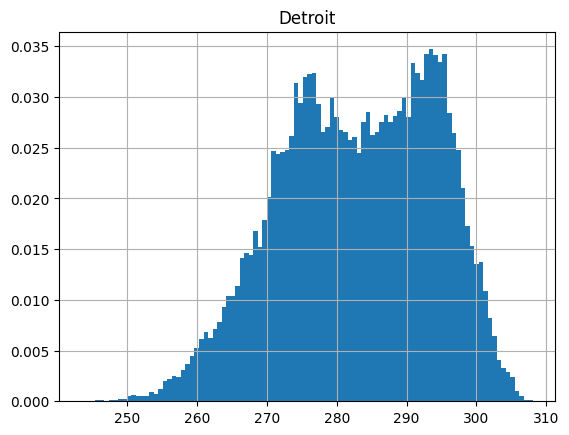

In [48]:
#histogram
hist = df.hist(density=True,bins=100)
plt.show()

In [49]:
m = df.dropna().values.mean()
std = df.dropna().values.std()

In [50]:
# we will test if a sample of the temperatures is from normal distirbution:
sample_size=100
df2 = df.sample(sample_size)

stats.kstest(df2.iloc[:,0], cdf='norm',args=(m, std))
# u args we put estimates of the ME and STD

KstestResult(statistic=0.09448131262414061, pvalue=0.31391784249464966, statistic_location=294.15, statistic_sign=-1)

In [51]:
# p-value is low - we reject H0 with high confidence

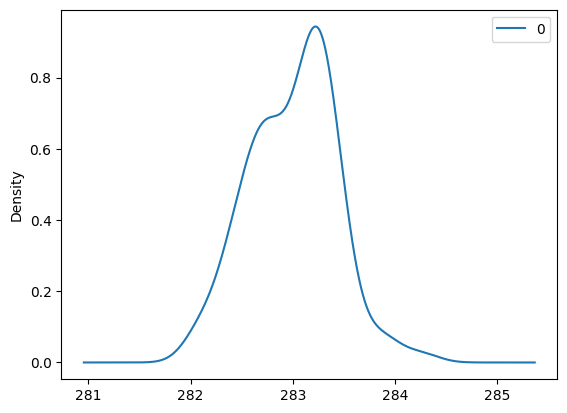

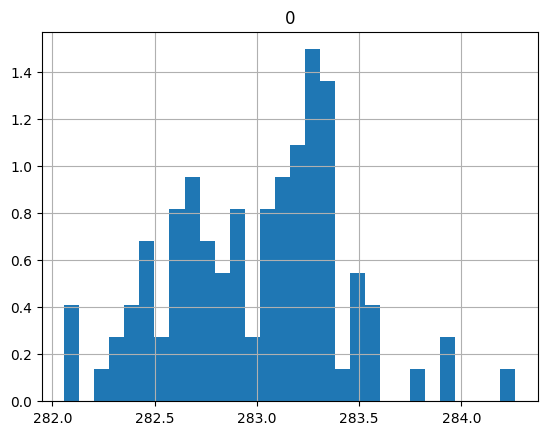

In [52]:
# Let's test the distribution of the ME estimators:

ME_estimators = []

sample_size=500
number_of_estimator_samples=100
for x in range(number_of_estimator_samples):

    sample=df.sample(sample_size)
    ME_estimators.append( sample.dropna().values.mean() )

    # or:
    #sample = np.random.choice(a= df.values, size=sample_size)
    #ME_estimators.append( sample.mean() )

# lets plot the estimated PDF  (using histogram) - we can guess that it is aspproximately normal!
pd.DataFrame(ME_estimators).plot(kind="density")

# histogram of the means:
hist = pd.DataFrame(ME_estimators).hist(density=True,bins=30)
plt.show()

In [53]:
# but lets test the H0 that these estimators have normal distribution:

stats.kstest(ME_estimators, cdf='norm',args=(df.dropna().values.mean(), df.dropna().values.std()/sample_size**0.5))

KstestResult(statistic=0.09980975760377409, pvalue=0.25464625793734336, statistic_location=283.07105656567995, statistic_sign=-1)

In [54]:
# Do we reject H0 or not (based on the p-value)?